 Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

 Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. 

## **BUSINESS PROBLEM OVERVIEW**


Customer churn prediction is extremely important for any business as it recognizes the clients who are likely to stop using their services.

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyse customer-level data of a leading telecom firm, do exploratory data analysis to identify the main indicators  why customers are leaving the company.

## **OBJECTIVE**

Customer churn occurs when customers stop doing business with a company.As the cost of retaining an existing customer is far less than acquiring a new one, maintaining a healthy customer base is important for the success of any business

The main objective of project is to :  
•	Finding  factors which influence customers to churn.
•	Retain churn customers by applying strategy and providing offers based on influencing factors.
•	Control churn rate and improve their image in the market.

## **Columns**

**State** **-**  States<br>
**Account length** **-** It is a period of time in a day,week or month(Not specified).<br>
**Area code** **-** Usually 3-digit number that identifies a particular telephone service area in a country.<br>
**International plan -** International calling plan is in a boolean format whether they have taken a plan or not.<br>
**Voice mail plan -** Voice mail plan is in a boolean format whether they have taken a plan or not.<br>
**Number vmail messages -** Number of voice mail send by a customer.<br>
**Total day minutes -** The person called & talked in day time in minutes.<br>
**Total day calls -** Number of calls they made in day.<br>
**Total day charge -** Charges of Day calls according to day calls & minutes they talked.<br>
**Total eve minutes -** The person called &  talked in evening time in minutes.<br>
**Total eve calls -** Number of calls they made in evening.<br>
**Total eve charge -** Charges of Evening calls according to evening calls & minutes they talked.<br>
**Total night minutes -** The person called & talked in night time in minutes.<br>
**Total night calls -** Number of calls they made in night.<br>
**Total night charge -** Charges of Night calls according to night calls & minutes they talked.<br>
**Total intl minutes -** The person called Internationally & talked in minutes.<br>
**Total intl calls -** Number of international calls they made.<br>
**Total intl charge -** Charges of international calls according to intl calls & minutes they talked.<br>
**Customer service calls -** Number of calls they made to Company's Customer care number for queries/complaints.<br>
**Churn -** Churn is in a boolean format whether they have Stopped the service or not.<br>

## **Loading Libraries & Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/Telecom_Churn.csv'
df=pd.read_csv(file_path)

## **Exploring Data**

In [ ]:
df.shape

(3333, 20)

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Checking if there exists any NULL in the data, so it doesn't throw any errors afterwards while fitting the model to the data.



In [ ]:
print(df.isnull().sum())

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


Above dataset has no null value.

Checking the data types for any unintend data types.


In [ ]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [ ]:
# Descriptive Analysis of the dataset 
df.describe()

## **Churns & Correlation**

> Indented block



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


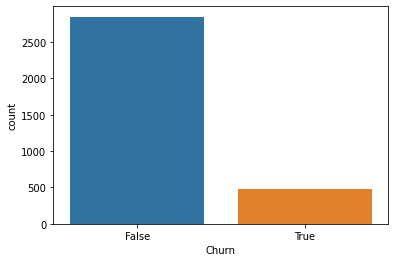

False    2850
True      483
Name: Churn, dtype: int64

In [ ]:
#Calculating the Churn
sns.countplot(df['Churn'])
plt.show()

df['Churn'].value_counts()

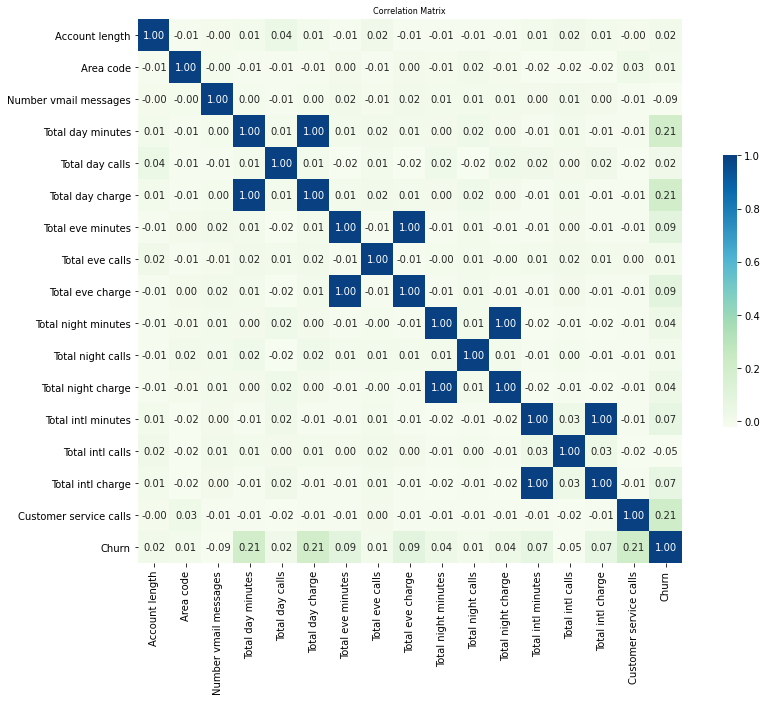

In [ ]:
#Checking any corelation between columns.

correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
ax = sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title('Correlation Matrix', fontsize=8)
plt.show()

From the graph we can see that there is a quite perfect linear relationship between between Mins and its corresponding Charge.  


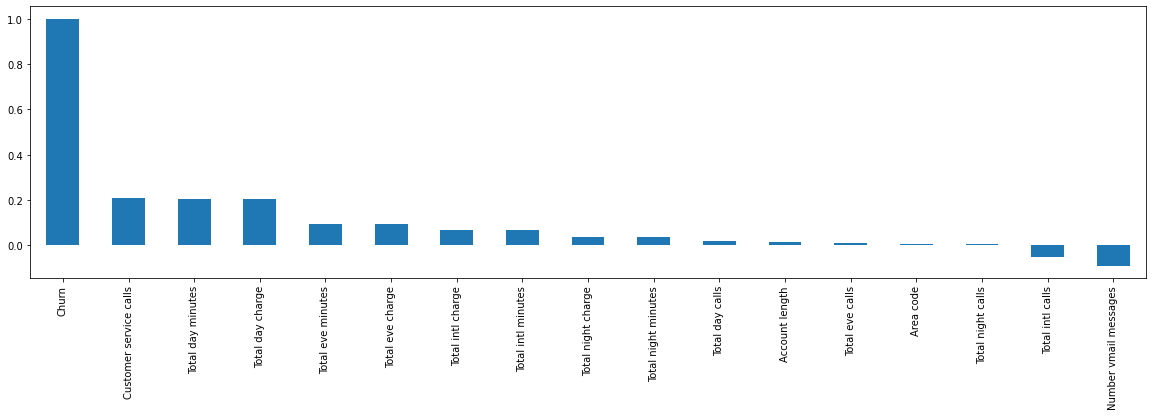

In [ ]:
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar',figsize = (20,5))


## **Column wise Analysis**

In [ ]:
#Function made to compare various column to Churn column

def bar_graph(x,y):
    
    df.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 40)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


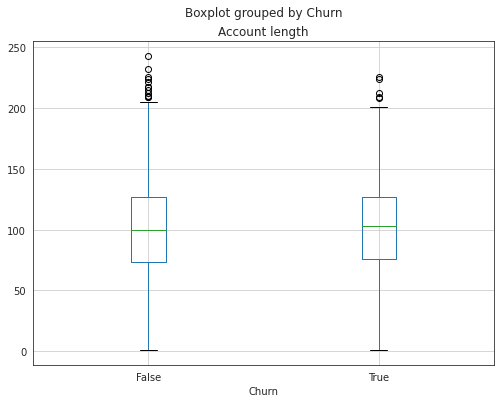

In [ ]:
# Box Plot for Account Length attribute 
df.boxplot(column='Account length',by='Churn')

The mean of Account length is almost similar to for both churn groups.

**STATE wise churn analysis**

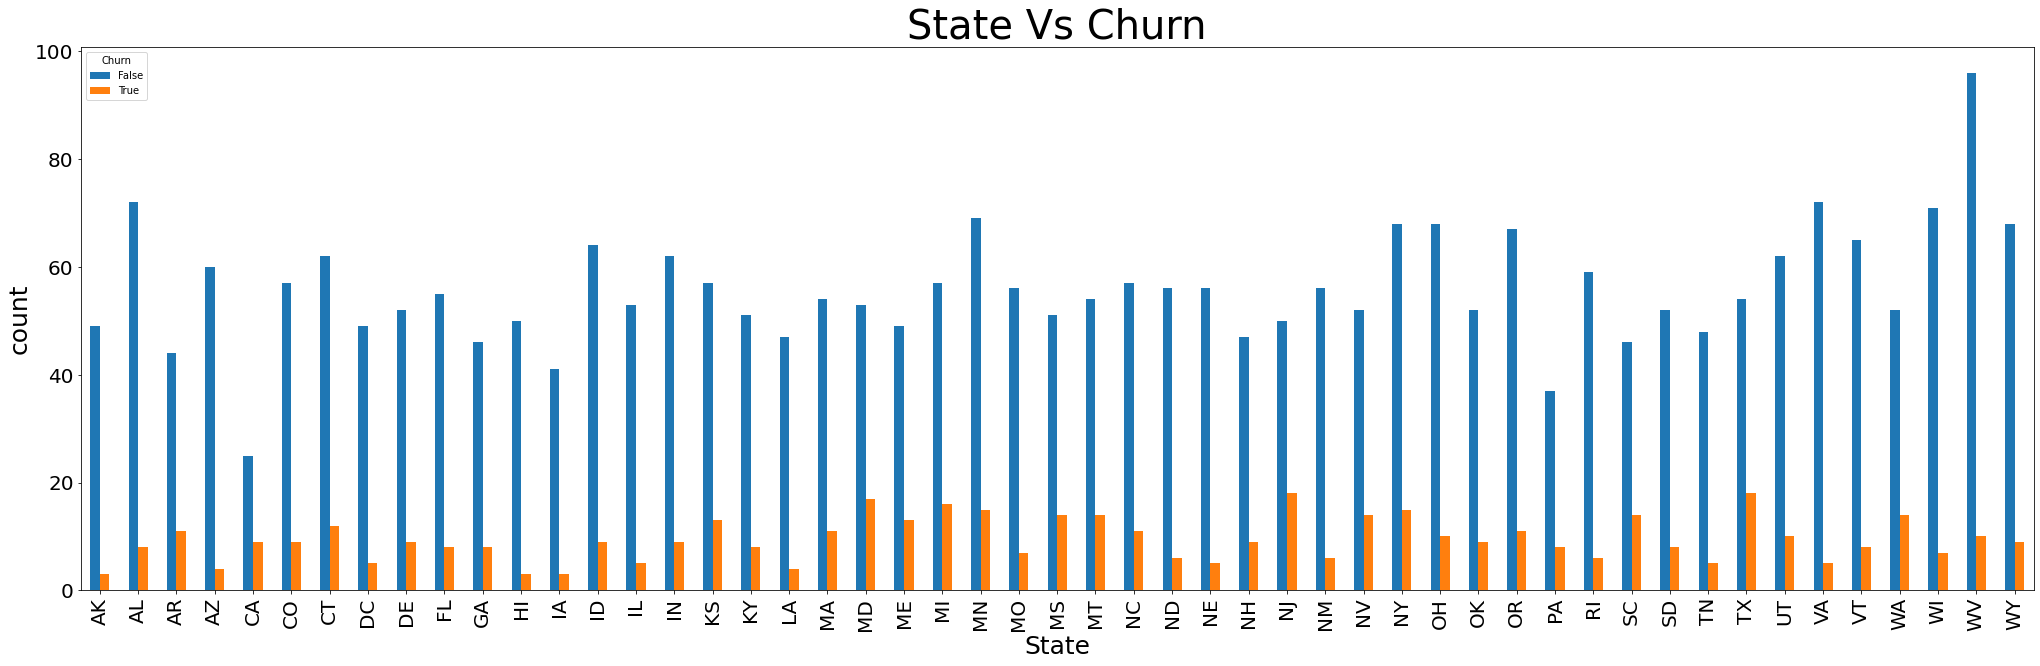

In [ ]:
bar_graph('State','Churn')

In [ ]:
# Checking the number of telecom users in states
df['State'].value_counts()

**AREA wise analysis**

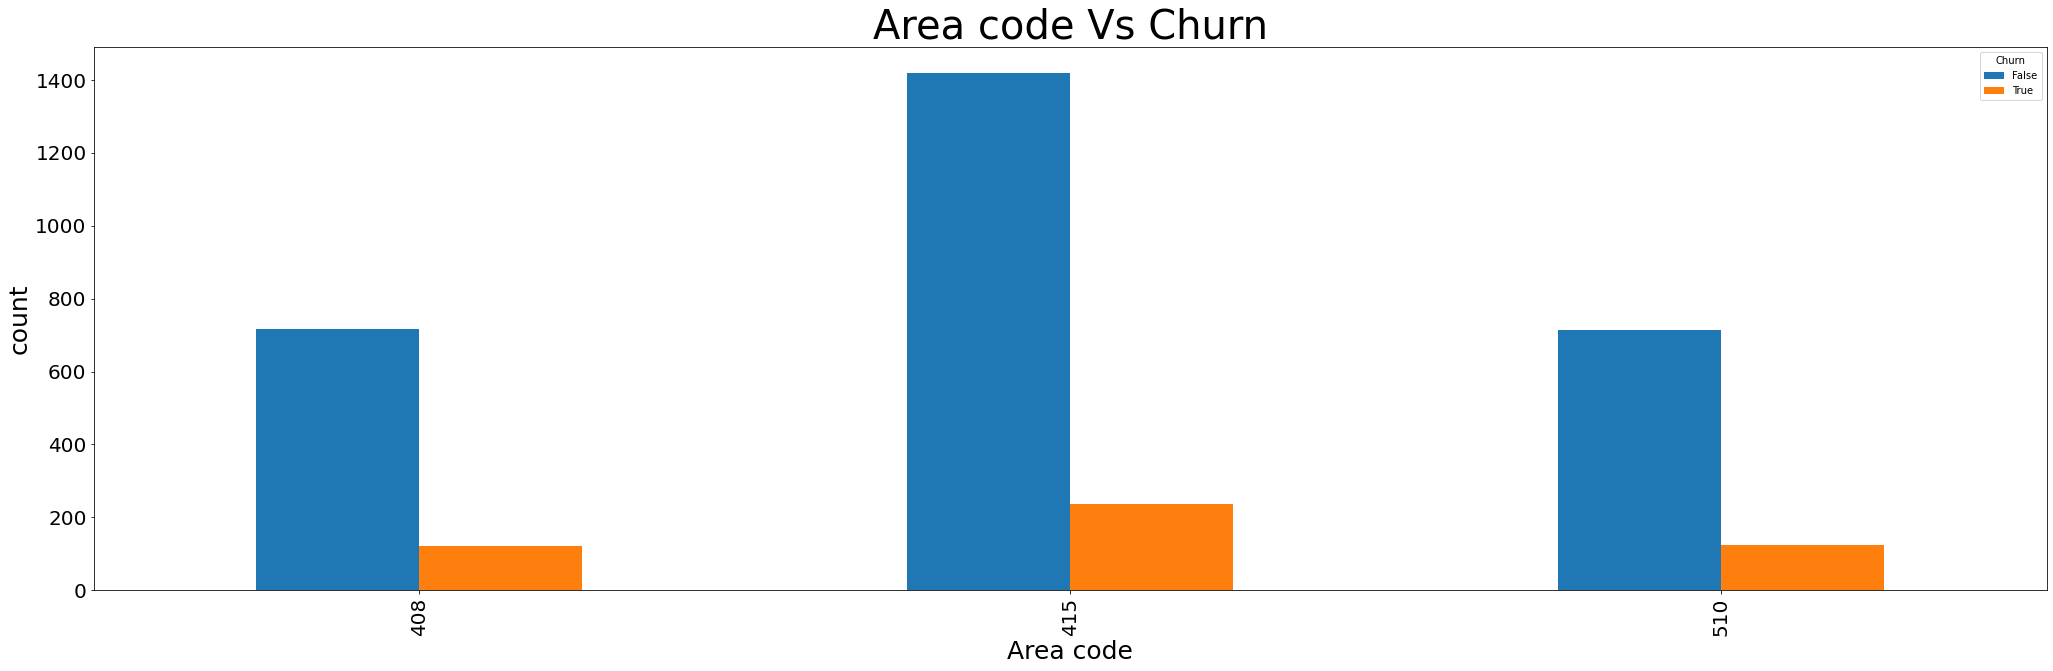

In [ ]:
#Area code vs Churn

bar_graph('Area code','Churn')

In [ ]:
df.groupby('Area code')['Churn'].mean()

Area code
408    0.145585
415    0.142598
510    0.148810
Name: Churn, dtype: float64

There is equal percentage of people who are churned in all states.

**International Plan Analysis**

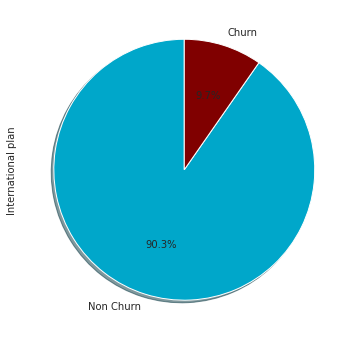

In [ ]:
df['International plan'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Non Churn','Churn'],
                               colors=['#00A7CA','Maroon'],
                               explode=[0,0])
                              

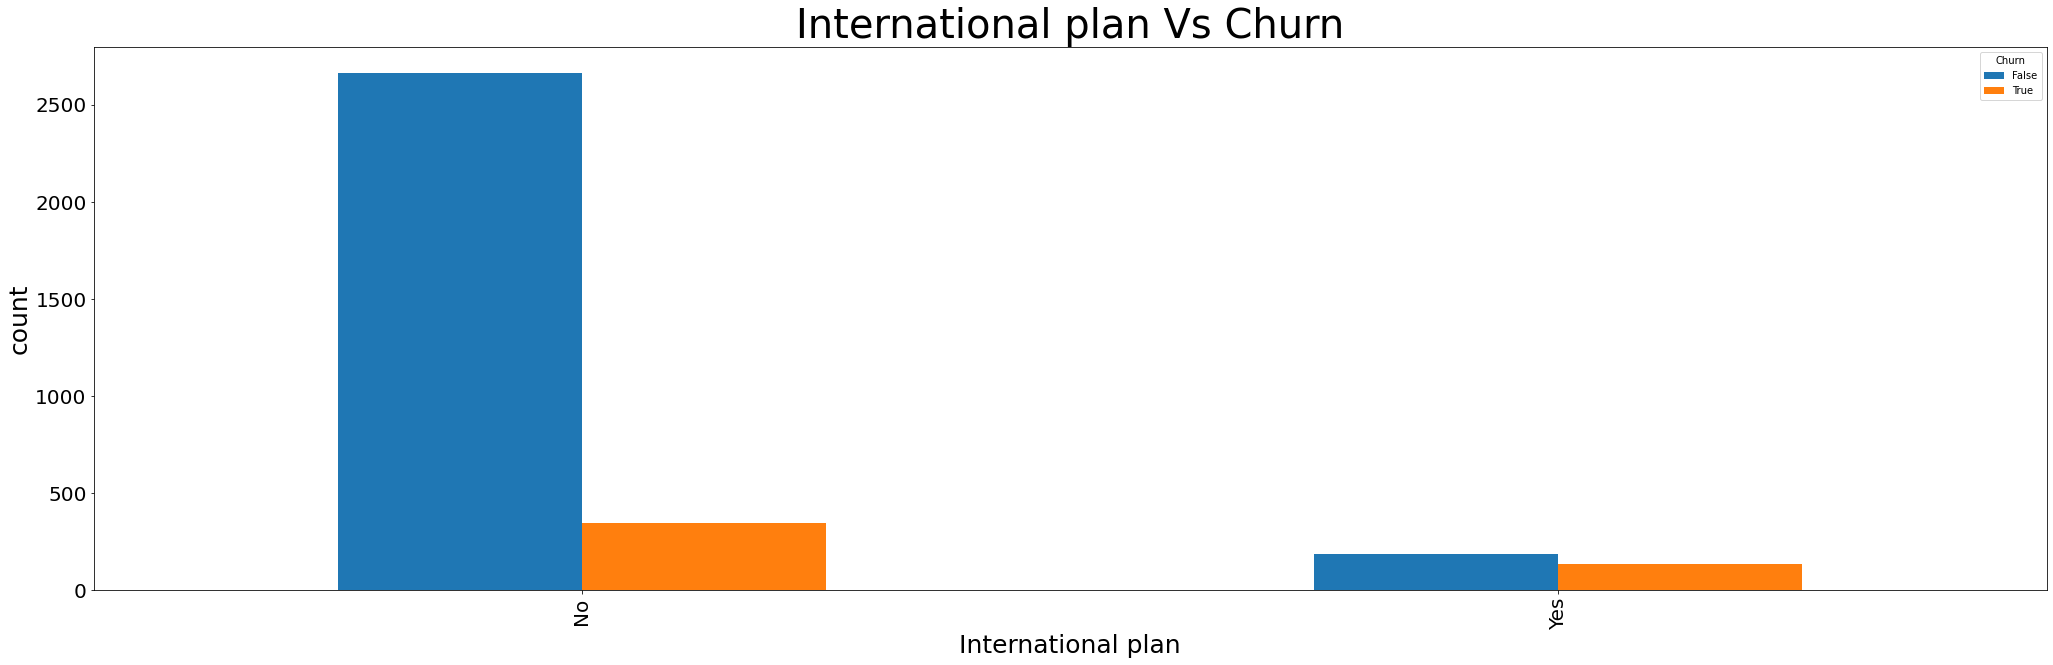

In [ ]:
bar_graph('International plan','Churn')

**Voice Plan Analysis**

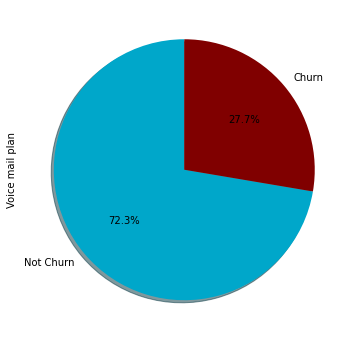

In [ ]:
df['Voice mail plan'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Churn','Churn'],
                               colors=['#00A7CA','Maroon'],
                               explode=[0,0])

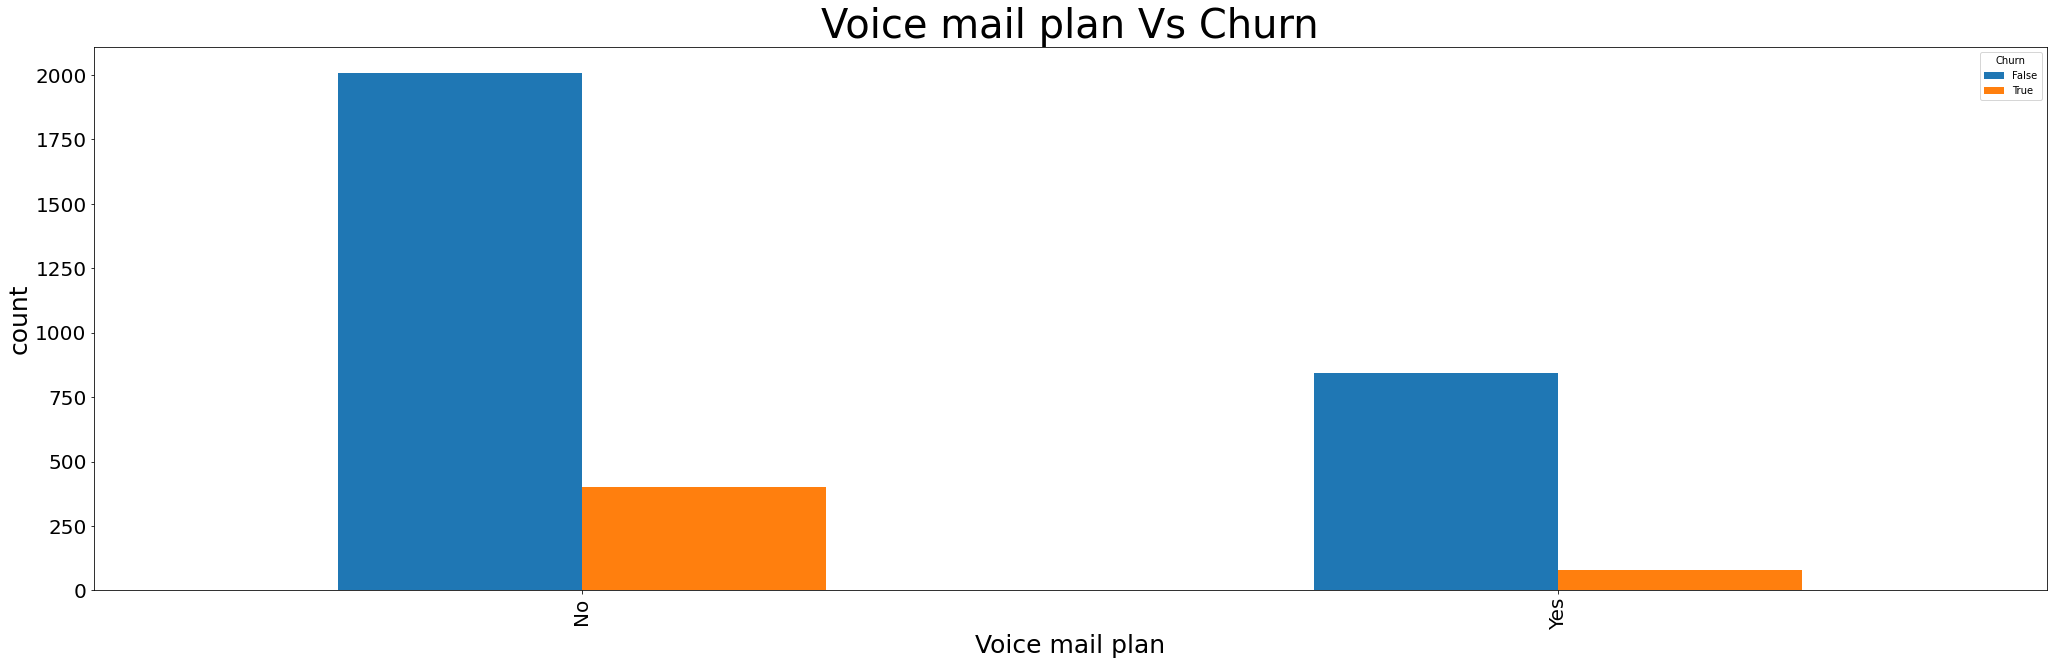

In [ ]:
bar_graph('Voice mail plan','Churn')

**Total Day calls, minutes & charge Analysis**

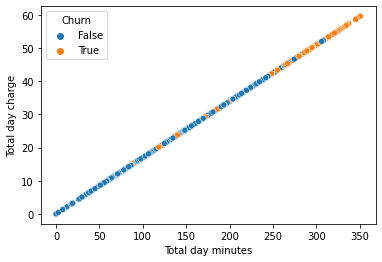

In [ ]:
sns.scatterplot(x='Total day minutes', y='Total day charge', hue='Churn', data=df)

In [ ]:
#Comparing Day Calls, Minutes & Charge with churn vs non-churn.
print(df.groupby(["Churn"])['Total day calls'].mean())
print(" ")
print(df.groupby(["Churn"])['Total day minutes'].mean())
print(" ")
print(df.groupby(["Churn"])['Total day charge'].mean())

Churn
False    100.283158
True     101.335404
Name: Total day calls, dtype: float64
 
Churn
False    175.175754
True     206.914079
Name: Total day minutes, dtype: float64
 
Churn
False    29.780421
True     35.175921
Name: Total day charge, dtype: float64


**Total Evening calls, minutes & charge Analysis**

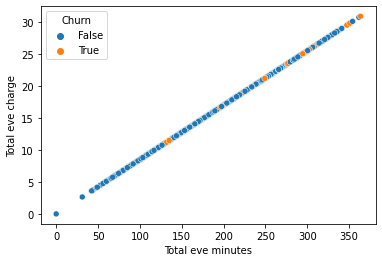

In [ ]:
sns.scatterplot(x='Total eve minutes', y='Total eve charge', hue='Churn', data=df)

In [ ]:
#Comparing Evening Calls, Minutes & Charge with churn vs non-churn.
print(df.groupby(["Churn"])['Total eve calls'].mean())
print(" ")
print(df.groupby(["Churn"])['Total eve minutes'].mean())
print(" ")
print(df.groupby(["Churn"])['Total eve charge'].mean())

Churn
False    100.038596
True     100.561077
Name: Total eve calls, dtype: float64
 
Churn
False    199.043298
True     212.410145
Name: Total eve minutes, dtype: float64
 
Churn
False    16.918909
True     18.054969
Name: Total eve charge, dtype: float64


**Total Night calls, minutes & charge Analysis** 

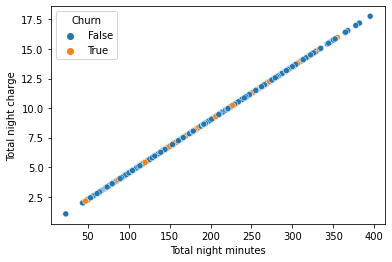

In [ ]:
sns.scatterplot(x='Total night minutes', y='Total night charge', hue='Churn', data=df)

In [ ]:
#Comparing Night Calls, Minutes & Charge with churn vs non-churn.
print(df.groupby(["Churn"])['Total night calls'].mean())
print(" ")
print(df.groupby(["Churn"])['Total night minutes'].mean())
print(" ")
print(df.groupby(["Churn"])['Total night charge'].mean())

Churn
False    100.058246
True     100.399586
Name: Total night calls, dtype: float64
 
Churn
False    200.133193
True     205.231677
Name: Total night minutes, dtype: float64
 
Churn
False    9.006074
True     9.235528
Name: Total night charge, dtype: float64


**Customer Service Analysis**

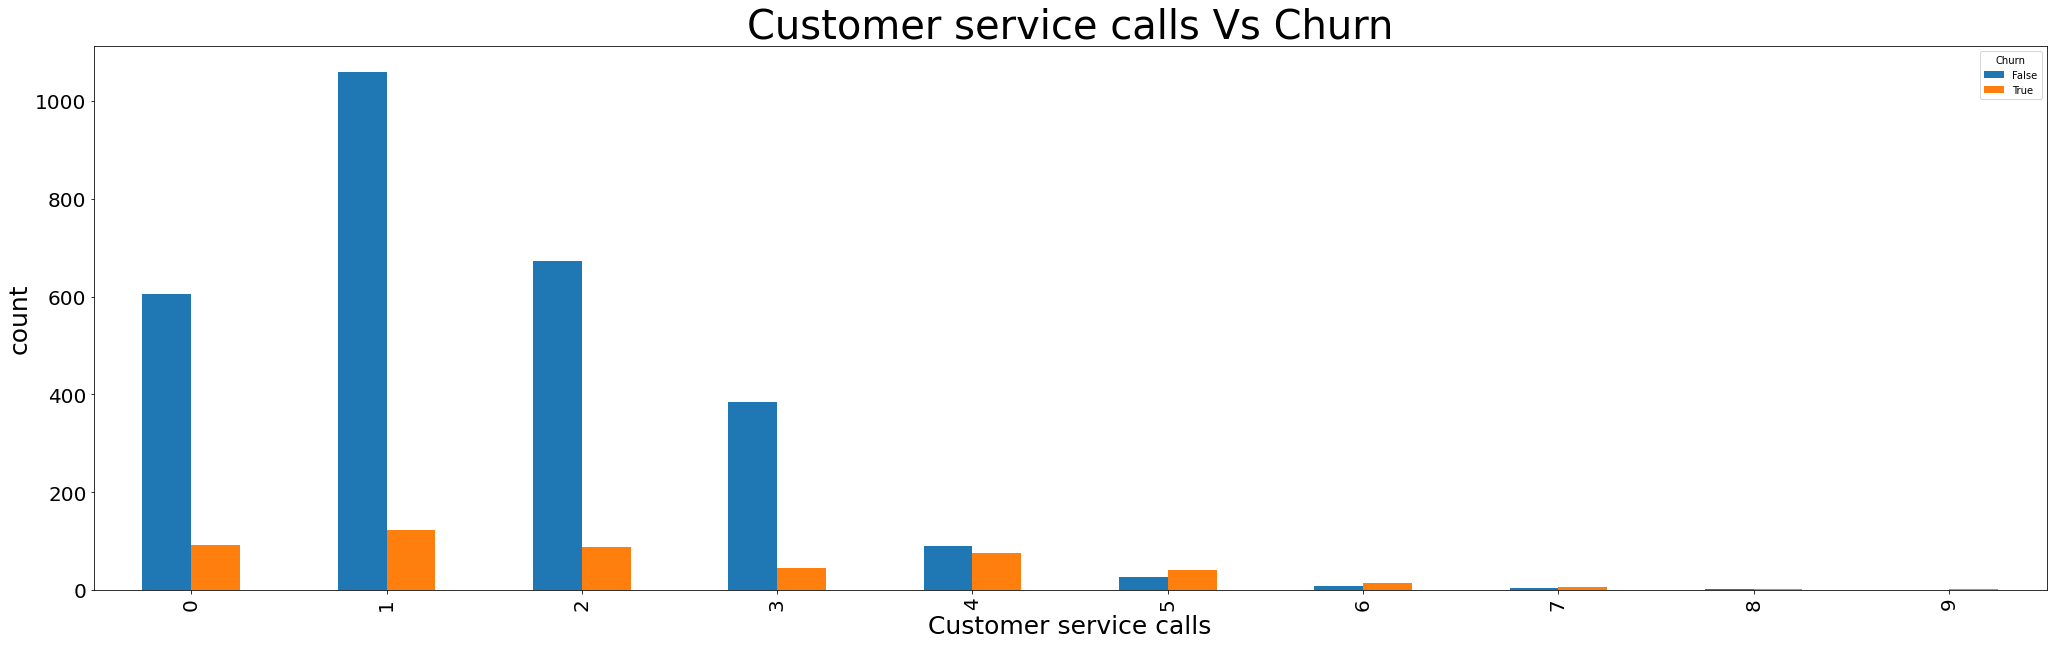

In [ ]:
bar_graph('Customer service calls','Churn')

Number of Customer Service calls wise Churning of customer

In [ ]:
df['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

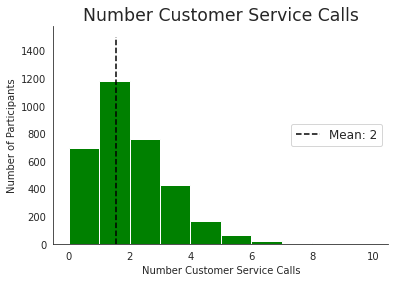

In [ ]:
plt.hist(
    df['Customer service calls'],
    bins=10,
    range=(0, 10),
    color='green')
plt.xlabel('Number Customer Service Calls')
plt.ylabel('Number of Participants')
plt.vlines(
    x=df['Customer service calls'].mean(),
    ymin=0,
    ymax=1500,
    linestyles='dashed',
    label="Mean: {:0.0f}".format(
        df['Customer service calls'].mean()))
plt.legend(loc=5, fontsize='large')
sns.set_style('white', {'axes.grid': False})
plt.title('Number Customer Service Calls', fontsize='xx-large')
sns.despine()

## **Insights**

Let us consider some of the insights we have gained into the churn data set through
the use of exploratory data analysis.

- The four charge fields are linear functions of the minute fields.

- The area code field and/or the state field are anomalous, and can be omitted.

The correlations among the remaining predictor variables are weak, allowing us to retain them all for any data mining model.

Insights with respect to churn:
 
- Customers with the International Plan tend to churn more frequently.

- Customers with four or more customer service calls churn more than four times as often as do the other customers.

- Customers with high day minutes and evening minutes tend to churn at a higher rate than do the other customers.

There is no obvious association of churn with the variables day calls, evening calls, night calls, international calls, night minutes, international minutes, account length, or voice mail messages.